# Full Text Search in Milvus 2.5: Combining Vector and Keyword Search

## The Problem We're Solving
Traditional setups require:
- Vector DB for semantic search
- Elasticsearch for keyword search
- Complex integration between both

## The Solution: One System to Rule Them All
Let's see how Milvus 2.5 handles both in a single system

In [1]:
! pip install pymilvus


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from pymilvus import DataType, Function, FunctionType, MilvusClient

client = MilvusClient(uri="http://localhost:19530")

schema = client.create_schema()

## The Setup

Remember the old days of:
1. Generate embeddings
1. Load them into Milvus
1. Pray they work
1. Debug when they don't

Yeah, forget all that. Just tell Milvus "here's my text" and "put the magic stuff here" - it handles the rest!


For example, below we have two fields:
* One for text
* One for the auto-generated sparse vectors

In [ ]:
## 1. Basic Setup
# Simple schema that handles both text and vectors

schema.add_field(
    field_name="id", datatype=DataType.INT64, is_primary=True, auto_id=True
)
schema.add_field(
    field_name="text", datatype=DataType.VARCHAR, max_length=1000, enable_analyzer=True
)
schema.add_field(field_name="sparse", datatype=DataType.SPARSE_FLOAT_VECTOR)

## BM25 Under the Hood

You can Milvus handles the conversion using BM25

In [ ]:
## 2. Automatic Text Analysis
# Milvus handles tokenization and BM25 conversion
bm25_function = Function(
    name="text_bm25_emb",  # Function name
    input_field_names=["text"],  # Name of the VARCHAR field containing raw text data
    output_field_names=[
        "sparse"
    ],  # Name of the SPARSE_FLOAT_VECTOR field reserved to store generated embeddings
    function_type=FunctionType.BM25,
)

schema.add_function(bm25_function)

In [ ]:
index_params = client.prepare_index_params()

index_params.add_index(field_name="sparse", index_type="AUTOINDEX", metric_type="BM25")

client.create_collection(
    collection_name="demo", schema=schema, index_params=index_params
)

## 3. Loading Test Data
# Mix of technical terms and regular text
client.insert(
    "demo",
    [
        {"text": "information retrieval is a field of study."},
        {
            "text": "information retrieval focuses on finding relevant information in large datasets."
        },
        {"text": "data mining and information retrieval overlap in research."},
    ],
)

# Searching

Just pass your query text directly. No preprocessing, no vector math, no tears - just ask your question and get answers.

In [ ]:
search_params = {
    "params": {"drop_ratio_search": 0.2},
}

## 4. Search Examples
# Example 1: Technical term search
search_result = client.search(
    collection_name="demo",
    data=["whats the focus of information retrieval?"],
    anns_field="sparse",
    limit=3,
    search_params=search_params,
)
print(search_result)

# Conclusion

### Why is it nice? 

#### Operational Simplicity
- One system instead of two
- No embedding pipeline to maintain
- Simple API for both keyword and vector search

#### Better Search Quality
- Handles technical terms like "SQL", "API", "BM25" naturally
- Combines best of both worlds:
  * Exact matching when needed
  * Semantic understanding where appropriate
- Real-time updates to search statistics


# ⭐️ Github
We hope you liked this tutorial showcasing how to llama-agents with Milvus and Mistral If you liked it and our project, please give us a star on Github! ⭐

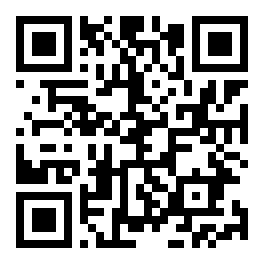

# 🤝 Add me on Linkedin!
If you have some questions related to Milvus, GenAI, etc, I am Stephen Batifol, you can add me on LinkedIn and I'll gladly help you.

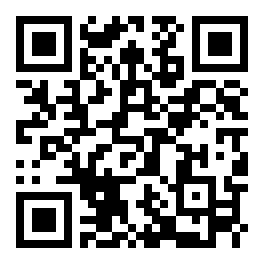

# 💬 Join our Discord

If you're interested in learning more about Milvus or you wanna share some feedback, feel free to join our [Discord channel](https://discord.com/invite/8uyFbECzPX).